In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('feature_engineered.csv', index_col=0)
df

,B365H,B365D,B365A,B365<2.5,Home_Win_Odds,Away_Win_Odds,B365>2.5,Home_Win_Prob,Away_Win_Prob,Draw_Prob,FTR,FTHG,FTAG,HTR,HTHG,HTAG,HS,AS,HST,AST
0,0.013216,0.211538,0.226100,0.192982,0.188345,0.005245,-1.357825,1.722724,-1.415632,-1.518066,H,2.0,1.0,A,0.0,1.0,10.0,8.0,2.0,4.0
1,0.108931,0.134615,0.024279,0.131579,0.013738,0.080736,-0.677538,-1.156991,1.357990,-0.335047,A,0.0,2.0,D,0.0,0.0,13.0,14.0,5.0,9.0
2,0.034842,0.134615,0.081942,0.122807,0.058639,0.019262,-0.522927,0.457185,-0.419621,-0.256739,A,0.0,1.0,A,0.0,1.0,10.0,10.0,4.0,6.0
3,0.044854,0.123077,0.062215,0.149123,0.042508,0.026818,-0.955837,0.066232,-0.058717,-0.044088,A,0.0,2.0,A,0.0,1.0,7.0,10.0,2.0,5.0
4,0.219063,0.153846,0.013657,0.184211,0.005775,0.173989,-1.234136,-1.836867,2.201234,-0.682464,A,1.0,3.0,D,1.0,1.0,7.0,25.0,2.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83379,0.439327,0.288462,0.005159,0.275439,0.001859,0.396487,-1.759812,-2.267965,3.178481,-2.374810,A,0.0,5.0,A,0.0,1.0,7.0,29.0,4.0,12.0
83380,0.030837,0.123077,0.099545,0.131579,0.071739,0.015584,-0.522927,0.621695,-0.664386,-0.037214,H,3.0,1.0,H,3.0,0.0,12.0,14.0,4.0,6.0
83381,0.082899,0.123077,0.034901,0.192982,0.020300,0.055750,-1.357825,-0.783488,0.846193,0.017282,A,0.0,1.0,A,0.0,1.0,17.0,18.0,5.0,6.0
83382,0.014818,0.230769,0.150228,0.315789,0.128766,0.008210,-1.883501,1.523726,-1.107999,-1.822046,H,7.0,0.0,H,5.0,0.0,23.0,6.0,10.0,1.0


In [3]:
df = df.iloc[:, :11]
df

,B365H,B365D,B365A,B365<2.5,Home_Win_Odds,Away_Win_Odds,B365>2.5,Home_Win_Prob,Away_Win_Prob,Draw_Prob,FTR
0,0.013216,0.211538,0.226100,0.192982,0.188345,0.005245,-1.357825,1.722724,-1.415632,-1.518066,H
1,0.108931,0.134615,0.024279,0.131579,0.013738,0.080736,-0.677538,-1.156991,1.357990,-0.335047,A
2,0.034842,0.134615,0.081942,0.122807,0.058639,0.019262,-0.522927,0.457185,-0.419621,-0.256739,A
3,0.044854,0.123077,0.062215,0.149123,0.042508,0.026818,-0.955837,0.066232,-0.058717,-0.044088,A
4,0.219063,0.153846,0.013657,0.184211,0.005775,0.173989,-1.234136,-1.836867,2.201234,-0.682464,A
...,...,...,...,...,...,...,...,...,...,...,...
83379,0.439327,0.288462,0.005159,0.275439,0.001859,0.396487,-1.759812,-2.267965,3.178481,-2.374810,A
83380,0.030837,0.123077,0.099545,0.131579,0.071739,0.015584,-0.522927,0.621695,-0.664386,-0.037214,H
83381,0.082899,0.123077,0.034901,0.192982,0.020300,0.055750,-1.357825,-0.783488,0.846193,0.017282,A
83382,0.014818,0.230769,0.150228,0.315789,0.128766,0.008210,-1.883501,1.523726,-1.107999,-1.822046,H


# test train split
since the number of instances are pretty sufficient, split ratio would be:
train : validation : test = 7 : 2 : 1

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1, stratify=df['FTR'], random_state=42)
train, val = train_test_split(train, test_size=2/9, stratify=train['FTR'], random_state=42)

In [5]:
x_train, y_train = train.drop(columns='FTR'), train['FTR']
x_val, y_val = val.drop(columns='FTR'), val['FTR']
x_test, y_test = test.drop(columns='FTR'), test['FTR']

# dimension reduction

## helper functions

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3D(x, y, z, title):
    %matplotlib notebook
    fig = plt.figure(figsize=(8,8))
    ax= fig.add_subplot(111, projection='3d')

    scat = ax.scatter(x,y,z, c=y_train_cmap, s=1)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    cb = plt.colorbar(scat, pad=0.02, fraction=0.046)
    cb.set_ticks([0,1,2])
    cb.set_ticklabels(['Home', 'Away', 'Draw'])
    ax.view_init(10,80)

    plt.title(title)
    plt.show()

In [11]:
c_map = {'H': 0, "A": 1, 'D': 2}
y_train_cmap = y_train.map(c_map)

# pca transformation function

In [12]:
def pca_transform(x):
    x = pca.transform(x)
    x = pd.DataFrame(x, columns=['PC1', 'PC2', 'PC3'])
    return x

# weighted f1 score evaluation function

In [13]:
def f1score(y_pred, y_true):
    from sklearn.metrics import f1_score
    return f1_score(y_pred, y_true, average='weighted')

# vanilla pca


In [14]:
x_train

,B365H,B365D,B365A,B365<2.5,Home_Win_Odds,Away_Win_Odds,B365>2.5,Home_Win_Prob,Away_Win_Prob,Draw_Prob
65520,0.098919,0.107692,0.036419,0.061404,0.018274,0.061673,0.713958,-0.957984,0.867540,0.576992
49155,0.006007,0.384615,0.362671,0.175439,0.332933,0.002445,-1.110448,2.389893,-1.687882,-3.023979
73154,0.014818,0.211538,0.180577,0.157895,0.150431,0.006862,-0.955837,1.577157,-1.251947,-1.536367
36838,0.066880,0.096154,0.050076,0.054386,0.029106,0.039209,1.023179,-0.474977,0.297958,0.725727
20746,0.034842,0.107692,0.089530,0.126316,0.062630,0.017981,-0.430161,0.424663,-0.547489,0.286129
...,...,...,...,...,...,...,...,...,...,...
65418,0.050861,0.115385,0.066768,0.114035,0.041634,0.027390,-0.368317,-0.022624,-0.083444,0.359329
38697,0.063676,0.115385,0.045524,0.140351,0.028296,0.040319,-0.770304,-0.429699,0.416997,0.166115
27542,0.034842,0.123077,0.077390,0.110526,0.056245,0.020115,-0.120940,0.390879,-0.383595,-0.136907
57778,0.030837,0.134615,0.099545,0.140351,0.071739,0.015584,-0.770304,0.657487,-0.648218,-0.220365


In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
train_pca = pca.fit_transform(x_train)

pca.explained_variance_ratio_

array([0.56503726, 0.37570386, 0.05809134])

In [16]:
train_pca = pd.DataFrame(train_pca, columns=['PC1', 'PC2', 'PC3'])
train_pca

,PC1,PC2,PC3
0,-1.569788,0.055633,0.227142
1,4.206616,0.485536,1.113508
2,2.698984,0.163914,0.224187
3,-1.175432,-0.666335,0.243637
4,0.559742,-0.295375,-0.586350
...,...,...,...
58363,-0.006460,0.021929,-0.520839
58364,-0.263464,0.760945,-0.583937
58365,0.542781,-0.184592,-0.050895
58366,1.124778,0.030826,-0.481240


In [18]:
plot3D(train_pca['PC1'],train_pca['PC2'],train_pca['PC3'], 'PCA')

<IPython.core.display.Javascript object>

it seems the data demonstrates a certain pattern, Away and Home wins clustered themselves at the two ends of paraboloid (viewed from above, projection onto PC1 and PC2), but the minima of paraboloid are mixed with all outcomes which might not be linearly separable

In [19]:
val_pca = pca_transform(x_val)

# model 1: KNeighbours classifier

In [20]:
knn_performance_uniform = []
knn_performance_distance = []

In [19]:
# from sklearn.neighbors import KNeighborsClassifier
#
# for i in range(1,100):
#     knc_uniform = KNeighborsClassifier(n_neighbors=i, weights='uniform')
#     knc_distance = KNeighborsClassifier(n_neighbors=i, weights='distance')
#
#     knc_uniform.fit(train_pca, y_train)
#     knc_distance.fit(train_pca, y_train)
#
#     score_uniform = f1score(knc_uniform.predict(val_pca), y_val)
#     score_distance = f1score(knc_distance.predict(val_pca), y_val)
#
#     knn_performance_uniform.append([i, score_uniform])
#     knn_performance_distance.append([i, score_distance])
#
# knn_performance_uniform = pd.DataFrame(knn_performance_uniform, columns=['neighbors', 'f1 score'])
# knn_performance_distance = pd.DataFrame(knn_performance_distance, columns=['neighbors', 'f1 score'])

In [20]:
# plt.figure()
# plt.plot(knn_performance_uniform['neighbors'], knn_performance_uniform['f1 score'], label='uniform')
# plt.plot(knn_performance_distance['neighbors'], knn_performance_distance['f1 score'], label='distance')
# plt.axvline(x=9, linestyle = '--', c='gray')
# plt.legend()

using 'distance' as weights seems to produce more stable results, it should be caused by low dependence on distant neighbors and focus on adjacent ones, so it could still maintain relatively high accuracy when number of neighbors increases
lets take k=9, where the small spike is observed in the 'uniform' weights

### evaluation

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
knn.fit(train_pca, y_train)

knn_score = f1score(knn.predict(val_pca), y_val)
print(knn_score)

0.8128120590512735


# model 2: Random forest

In [22]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
#
# param_grid = {
#     'n_estimators': list(range(100, 300, 10)),
#     'max_depth': list(range(4,7)),
#     'min_samples_split': list(range(2,5)),
# }
#
# rnf_gs = GridSearchCV(RandomForestClassifier(), param_grid, cv=5,
#                       return_train_score=True, scoring='f1_weighted', n_jobs=-1)
# rnf_gs.fit(train_pca, y_train)
# rnf_gs.best_params_

{'max_depth': 6, 'min_samples_split': 4, 'n_estimators': 240}

### evaluation

In [23]:
from sklearn.ensemble import RandomForestClassifier

rnf = RandomForestClassifier(n_estimators=240, max_depth=6, min_samples_split=4)
rnf.fit(train_pca, y_train)

rnf_score = f1score(rnf.predict(val_pca), y_val)
print(rnf_score)

0.582624170365436


# model 3: polynomial SVC

### 2md degree

In [24]:
# from sklearn.preprocessing import PolynomialFeatures
#
# poly2 = PolynomialFeatures(degree=2)
# train_pca_2d, val_pca_2d = poly2.fit_transform(train_pca), poly2.fit_transform(val_pca)

In [25]:
# from sklearn.svm import SVC
#
# svc2, svc1 = SVC(kernel='linear'), SVC(kernel='linear')
#
# svc2.fit(train_pca_2d, y_train)
# svc1.fit(train_pca, y_train)
#
# svc_score_2d = f1score(svc2.predict(val_pca_2d), y_val)
# svc_score_1d = f1score(svc1.predict(val_pca), y_val)

# print('f1 score of 2nd degree SVC: ', svc_score_2d)
# print('f1 score of linear SVC: ', svc_score_1d)

f1 score of 2nd degree SVC: 0.5789544080605273
f1 score of linear SVC: 0.578168453180407

# model 4: XGBoost

In [26]:
# from xgboost.sklearn import XGBClassifier
# from sklearn.model_selection import GridSearchCV
#
# param_grid = {
#     'n_estimator': list(range(100, 130, 10)),
#     'max_depth': list(range(9,11)),
#     'learning_rate': [0.3,0.5, 0.8],
# }
#
# xgb_gs = GridSearchCV(XGBClassifier(), param_grid, cv=5,
#                       return_train_score=True, scoring='f1_weighted', n_jobs=-1)
# xgb_gs.fit(train_pca, y_train)
#
# xgb_gs.best_params_

{'learning_rate': 0.8, 'max_depth': 10, 'n_estimator': 100}

In [ ]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.8, max_depth=10, n_estimator=100)
xgb.fit(train_pca, y_train)

### evaluate

In [28]:
xgb_score = f1score(xgb.predict(val_pca), y_val)
print(xgb_score)

0.7970783314756056


# model 5: Logistic regression

In [29]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
#
# lr = LogisticRegression()
#
# param_grid = {
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'C': list(x * 0.1 for x in range(6, 14)),
#     'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
#     'l1_ratio': list(x * 0.1 for x in range(1,9))
# }
#
# lr_gs = GridSearchCV(lr, param_grid, n_jobs=-1, cv=5,
#                      return_train_score=True, scoring='f1_weighted')
# lr_gs.fit(train_pca, y_train)
# lr_gs.best_params_

{'C': 0.6000000000000001, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga'}

### evaluate

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.6, l1_ratio=0.1, penalty='l1', solver='saga')
lr.fit(train_pca, y_train)

lr_score = f1score(lr.predict(val_pca), y_val)
lr_score

0.5693781599815881

# bagging

## KNneighbors

In [31]:
from sklearn.ensemble import BaggingClassifier

bag_clf_knn = BaggingClassifier(
    KNeighborsClassifier(n_neighbors=9, weights='distance'), n_estimators=500,
    max_samples=1000, bootstrap=True, n_jobs=-1, oob_score=True
)
bag_clf_knn.fit(train_pca, y_train)

In [32]:
bag_clf_knn_score = f1score(bag_clf_knn.predict(val_pca), y_val)
bag_clf_knn_score

0.5847047638775008

# voting

In [33]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost.sklearn import XGBClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import VotingClassifier
# from sklearn.model_selection import GridSearchCV
#
# lr = LogisticRegression(C=0.6, l1_ratio=0.1, penalty='l1', solver='saga')
# knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
# rnf = RandomForestClassifier(n_estimators=240, max_depth=6, min_samples_split=4)
# xgb = XGBClassifier(learning_rate = 0.8, max_depth=10, n_estimator=100)
#
#
#
# param_grid = {
#     'estimators': [[('xgboost', xgb),('knn', knn),('rnf',rnf)],
#                    [('xgboost', xgb),('knn', knn)],
#                    [('xgboost', xgb),('knn', knn),('rnf',rnf), ('lr', lr)],
#                    [('xgboost', xgb),('knn', knn),('lr',lr)]],
#     'voting': ['hard', 'soft']
# }
#
# voting_clf = VotingClassifier(estimators=('lr', lr))
# voting_gs = GridSearchCV(voting_clf, param_grid, cv=3,
#                          return_train_score=True, n_jobs=-1, scoring='f1_weighted')
# voting_gs.fit(train_pca, y_train)
#
# voting_gs.best_params_

{estimators=[('xgboost', xgb),('knn', knn),('lr',lr)], voting='soft'}

## evaluate

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('xgboost', xgb),('knn', knn),('lr',lr)],
    voting='soft'
)

voting_clf.fit(train_pca, y_train)
voting_score = f1score(voting_clf.predict(val_pca), y_val)
voting_score

slight improvement from the best model alone (KNN, f1: 0.8128120590512735)

# evaluating with test data

In [35]:
test_pca = pca_transform(x_test)

In [36]:
f1score(voting_clf.predict(test_pca), y_test)

0.816819684936644

# visualise model performance

In [38]:
y_test.index = test_pca.index

In [39]:
voting_clf.classes_

array(['A', 'D', 'H'], dtype=object)

In [40]:
test_pca[['A_prob', 'D_prob', 'H_prob']] = voting_clf.predict_proba(test_pca)

In [41]:
test_pca['prediction'] = voting_clf.predict(test_pca.iloc[:, :3])
test_pca = pd.concat([test_pca, y_test], axis=1)
test_pca

,PC1,PC2,PC3,A_prob,D_prob,H_prob,prediction,FTR
0,-0.127431,0.787103,-0.487108,0.702243,0.142649,0.155108,A,A
1,1.072514,-0.259038,-0.186216,0.459111,0.102883,0.438006,A,H
2,-0.329519,0.155728,-0.800235,0.147012,0.138674,0.714314,H,H
3,-0.090313,0.088210,-0.284249,0.171844,0.366855,0.461301,H,D
4,-0.233232,-0.710244,-0.178097,0.330161,0.357431,0.312408,D,A
...,...,...,...,...,...,...,...,...
8334,-1.237499,-2.150170,0.675127,0.091483,0.161945,0.746572,H,H
8335,-0.993282,-0.094400,-0.041230,0.387620,0.464926,0.147454,D,A
8336,-1.699345,0.013675,0.119447,0.201279,0.586157,0.212565,D,D
8337,-0.524648,-0.384109,-0.269131,0.310965,0.294900,0.394135,H,D


In [94]:
incorrect = test_pca[test_pca['prediction'] != test_pca['FTR']]
correct = test_pca.drop(incorrect.index, axis=0)

## confusion matrix

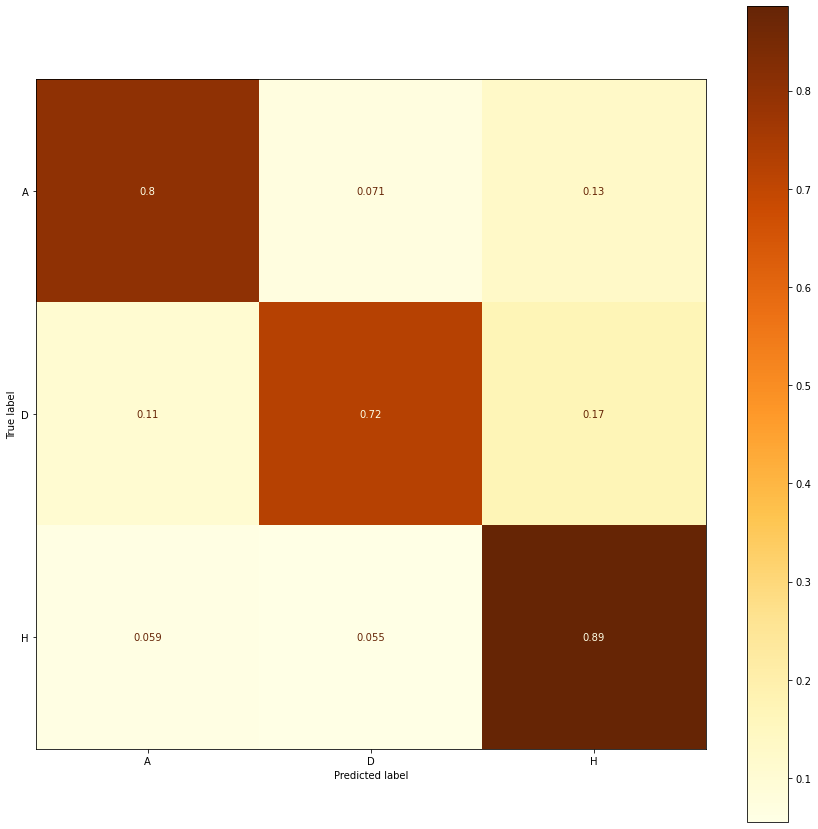

In [95]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, voting_clf.predict(test_pca.iloc[:, 0:3]), labels=voting_clf.classes_)

disp = ConfusionMatrixDisplay.from_predictions(
                  y_test, voting_clf.predict(test_pca.iloc[:, 0:3]),
                  labels=voting_clf.classes_,
                  cmap=plt.cm.YlOrBr,
    normalize='true'
)
fig = disp.ax_.get_figure()
fig.set_figwidth(15)
fig.set_figheight(15)

## prediction distributions

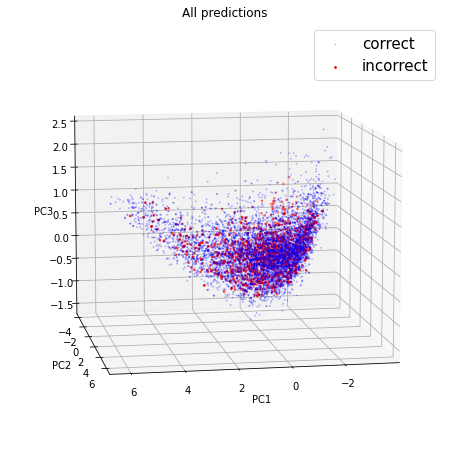

In [96]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot(111, projection='3d')

x_correct = correct['PC1']
y_correct = correct['PC2']
z_correct = correct['PC3']

x_incorrect = incorrect['PC1']
y_incorrect = incorrect['PC2']
z_incorrect = incorrect['PC3']

scat_correct = ax.scatter(x_correct, y_correct, z_correct, s=1, c='blue', alpha=0.2, label='correct')
scat_incorrect = ax.scatter(x_incorrect, y_incorrect, z_incorrect, s=3, c='red', label='incorrect')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(10,80)

plt.title('All predictions')
plt.legend(prop={'size': 15})
plt.show()

as speculated upon PCA is done, predictions at the two ends of paraboloid are less prone to error, the mis-classification mainly happens in the minima region of paraboloid

In [97]:
%matplotlib notebook

fig = plt.figure(figsize=(8,4))
ax= fig.add_subplot(121, projection='3d')

x_correct = correct['PC1']
y_correct = correct['PC2']
z_correct = correct['PC3']
ax.scatter(x_correct, y_correct, z_correct, s=1, c='blue', alpha=0.2)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(10,80)
plt.title('Correct predictions')

ax = fig.add_subplot(122, projection = '3d')
x_incorrect = incorrect['PC1']
y_incorrect = incorrect['PC2']
z_incorrect = incorrect['PC3']
ax.scatter(x_incorrect, y_incorrect, z_incorrect, s=1, c='red')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(10,80)

plt.title('Incorrect predictions')
plt.show()

<IPython.core.display.Javascript object>

## distribution of probabilities of correct and incorrect predictions

In [98]:
correct_prob = correct[['A_prob', 'D_prob', 'H_prob']]
correct_max_prob = correct_prob.max(axis=1)

incorrect_prob = incorrect[['A_prob', 'D_prob', 'H_prob']]
incorrect_max_prob = incorrect_prob.max(axis = 1)

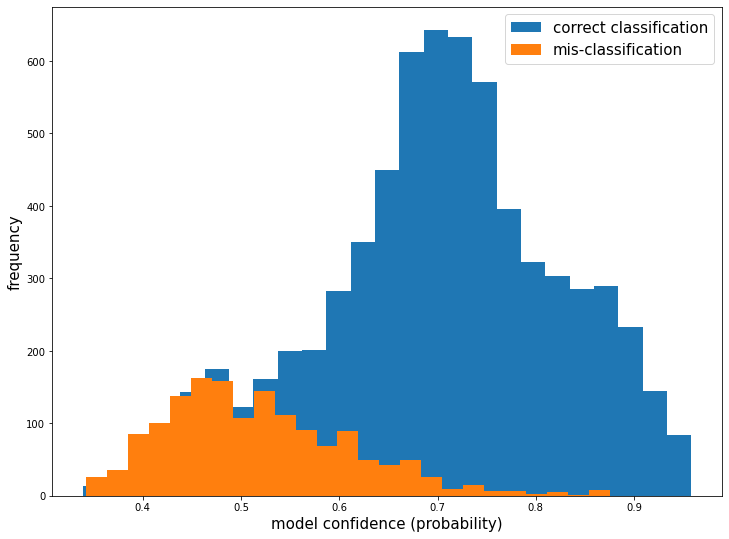

In [99]:
%matplotlib inline

plt.figure(figsize=(12,9))
plt.hist(correct_max_prob, bins=25, label='correct classification')
plt.hist(incorrect_max_prob, bins=25, label= 'mis-classification')
plt.xlabel('model confidence (probability)', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.legend(prop = {'size': 15})
plt.show()

its a good sign that both distributions are seemingly different, the model should gain confidence after a certain probability threshold

lets run a quick test to be sure that they originate from a different distribution

In [100]:
from scipy.stats import ks_2samp

ks_2samp(correct_max_prob.values, incorrect_max_prob.values)

KstestResult(statistic=0.6252988953866147, pvalue=0.006136602782326528)

Wonderful! since p-value < 0.05, the model's confidence do reflect the potential outcome and it is capable of finding patterns hidden in bet odds. It might provide some insights on match result

## finding model probability threshold

From the above diagram, the model performs poorly at low probability region, there is considerable chances of mis-classification. To find the threshold of probability predicted by the model that give confident predictions, lets plot the posterior probability <br> P(correct prediction | probability interval) with interval = 0.04

In [101]:
posterior = []

for i in range(8,23):
    prob = len(correct_max_prob.loc[(correct_max_prob > i * 0.04) & (correct_max_prob < (i+1) * 0.04)]) / (len(correct_max_prob.loc[(correct_max_prob > i * 0.04) & (correct_max_prob < (i+1) * 0.04)]) + len(incorrect_max_prob.loc[(incorrect_max_prob > i * 0.04) & (incorrect_max_prob < (i+1) * 0.04)]))

    posterior.append(prob)

In [103]:
posterior = pd.Series(posterior, index= list(x *0.04 for x in range(9,24)))
posterior

0.36    0.366667
0.40    0.420455
0.44    0.387302
0.48    0.436929
0.52    0.515464
0.56    0.555773
0.60    0.702335
0.64    0.806548
0.68    0.917109
0.72    0.954419
0.76    0.979695
0.80    0.983845
0.84    0.987526
0.88    0.981744
0.92    1.000000
dtype: float64

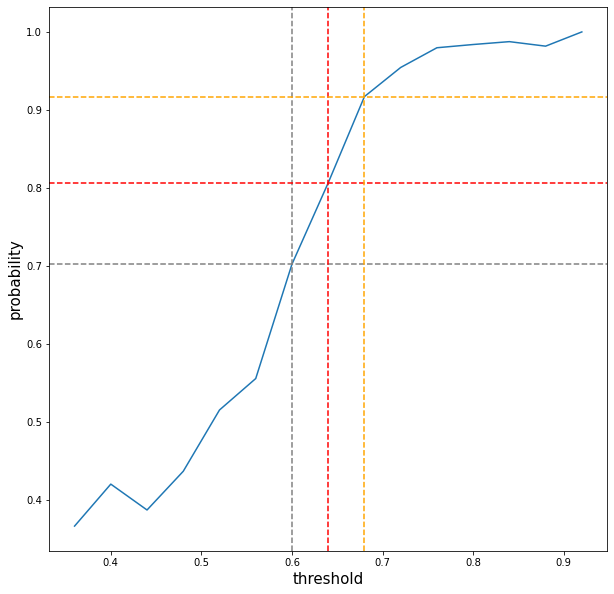

In [48]:
plt.figure(figsize=(10,10))
posterior.plot()
plt.ylabel('probability', fontsize = 15)
plt.xlabel('threshold', fontsize = 15)

plt.axvline(0.6, color='gray', linestyle='--')
plt.axhline(posterior[0.6], color = 'gray', linestyle = '--')
plt.axvline(0.64, color='red', linestyle='--')
plt.axhline(posterior[0.64], color = 'red', linestyle = '--')
plt.axvline(0.68, color='orange', linestyle='--')
plt.axhline(posterior[0.68], color = 'orange', linestyle = '--')

in summary,
model prediction probability threshold : actual accuracy
0.6  : 0.702335
0.64 : 0.806548
0.68 : 0.917109